In [8]:
from sympy import MatrixSymbol, Matrix, Identity

import sympy as sym
import pandas as pd
import math

sym.init_printing()
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import control
import random

# IDENTIFICACIÓN DE SISTEMAS

Profesor: Jairo Alberto Cuéllar Guarnizo  
Programa: Ingeniería en Automatización y Control

## Modelos a partir de la curva de reacción

* Modelo de primer orden
* Modelo de segundo orden
* Sistemas con Tiempo muerto

Es un método de identificación que se basa en características que presenta la curva de respuesta del sistema frente a una entrada de escalón o cualquier entrada. Estas características pueden ser: Valor final, tiempo de estabilización, sobrepaso máximo, etc.

## Sistemas de primer orden

Un sistema de primer orden es aquel que en su modelo analítico en tiempo continuo, involucra por lo menos una primera derivada de la variable de interés. Los parámetros a tener en cuenta para la identificación son: Constante de tiempo($\tau$), ganancia (K).

$$G(s)=\frac{K}{\tau s + 1}$$

$\tau$: Hace referencia a la velocidad de respuesta del sistema, tanto más grande la constante de tiempo más lento responde el sistema.

Por ejemplo, si modelamos una adquisición de datos de un sistema de primer orden así:

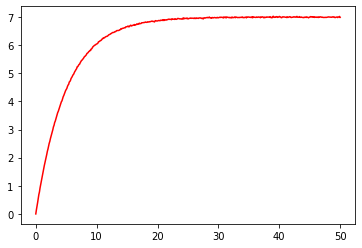

In [9]:
## Respuesta típica de un sistema de primer orden con ruido
## Simulando el experimento de medición
K = 7
tao = 5
tf = 50
dt = 0.1
t = np.linspace(0,tf,int(tf/dt)+1)

g = control.tf(K,[tao,1])
_,y = control.step_response(g,t)
N = len(t)
## Ruido para simular la señal de salida capturada "yn"
r = 0.01
e = np.random.normal(0,r,size=N)
yn = y+e
plt.plot(t,yn,color = 'red')

## Experimento de identificación

**Paso 1:** Identificar el 60% del valor final para poder determinar el $\tau$ del sistema. Y el tiempo de establecimiento ($t_s = 4\tau$).

In [10]:
## Determinando tao (sin conocer al función original)
tao = 0;

## Visualmente definimos el 60% del valor final
V6 = 0.6*K;

for k in range(N):
    if(yn[k]>=V6):
        tao = t[k]
        break
## Calculando el tiempo de establecimiento
ts = 4*tao
ts, tao

**Paso 2:** Determinar una aproximación del valor final, para este caso es calcular el valor promedio de todas las "yn" para un tiempo mayor al de establecimiento.

In [11]:
## Calculando el valor final (Sin conocer sistema original)
Kf = 0
i1 = 0;
i2 = 0;
for j in range(N-k):
    if(t[j]>ts):
        i1 = j+k
        Kf = Kf+yn[i1]
        i2 = i2+1

Kf = Kf/i2
print(Kf)                

6.987198111179028


**Paso 3:** Armar la función de transferencia estimada

ECM: 0.0038219641746459793


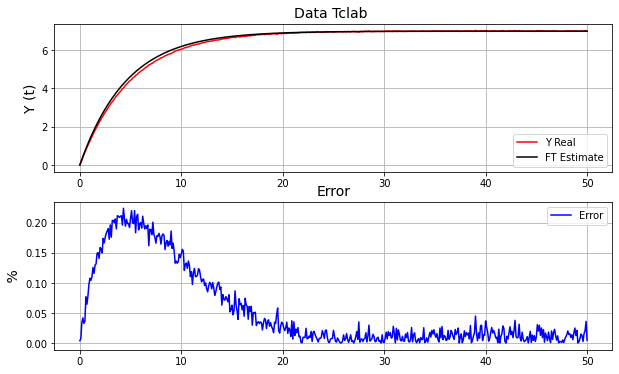

In [22]:
## Armando la función de transferencia aproximada:
ge = control.tf([Kf],[tao,1])
_,ye = control.step_response(ge,t)

e = np.abs(yn - ye)

ECM = np.sqrt(np.dot((yn[0:len(ye)]-ye[0:len(ye)]).transpose(),(yn[0:len(ye)]-ye[0:len(ye)])))/len(ye)

print(f"ECM: {ECM}")

# Plot
plt.figure(figsize=(10,6))

ax=plt.subplot(2,1,1)
ax.grid()
plt.title("Data Tclab ",fontsize = 14)
plt.plot(t,yn,color = 'red' ,label='Y Real')
plt.plot(t,ye,color = 'black', label='FT Estimate')
plt.ylabel('Y (t)', fontsize = 14)
plt.legend(loc='best')

ax=plt.subplot(2,1,2)
ax.grid()
plt.title("Error",fontsize = 14)
plt.plot(t,e,color = 'blue', label='Error')
plt.ylabel(' % ', fontsize = 14)
plt.legend(loc='best')